In [1]:
%pylab inline
from QuantLib import *
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def set_unit_square(ax):
    ax.axis('scaled')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

In [3]:
rng = MersenneTwisterUniformRng(42)

In [4]:
xs = []
ys = []
for i in range(2047):
    xs.append(rng.next().value())
    ys.append(rng.next().value())

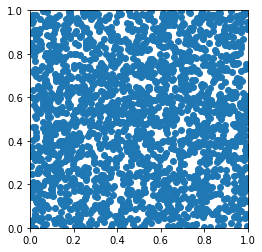

In [5]:
fig, ax = plt.subplots()
set_unit_square(ax)
g = ax.plot(xs,ys,'o')

In [6]:
#The same does not hold for quasi-random numbers. Each number is correlated
#to the following number, which ruins the random properties of the sequence when
#used in the wrong dimensionality

In [7]:
rng = SobolRsg(1)

In [8]:
xs = []
ys = []
for i in range(2047):
    xs.append(rng.nextSequence().value()[0])
    ys.append(rng.nextSequence().value()[0])


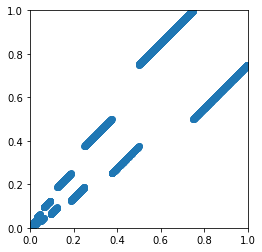

In [9]:
fig, ax = plt.subplots()
set_unit_square(ax)
g = ax.plot(xs,ys,'o')

In [10]:
#In the right dimensionality
rng = SobolRsg(2)

In [11]:
xs = []
ys = []
for i in range(2047):
    x,y = rng.nextSequence().value()
    xs.append(x)
    ys.append(y)

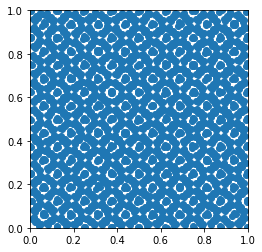

In [12]:
fig, ax = plt.subplots()
set_unit_square(ax)
g = ax.plot(xs,ys, 'o')

In [13]:
rng = SobolRsg(3)

In [14]:
xs = [ rng.nextSequence().value() for i in range(1023)]

In [15]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

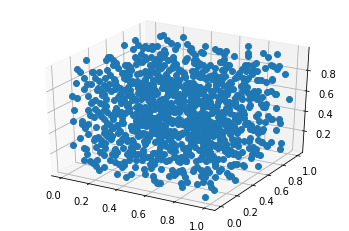

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
X,Y,Z = zip(*xs)
g = ax.plot(X,Y,Z, 'o')

In [18]:
def section(xs, i):
    return [x[i] for x in xs]

In [19]:
def project(ax, xs, i, j, title=None):
    set_unit_square(ax)
    ax.set_title(title or "(%d, %d)" % (i,j))
    ax.plot(section(xs,i), section(xs, j), 'o')

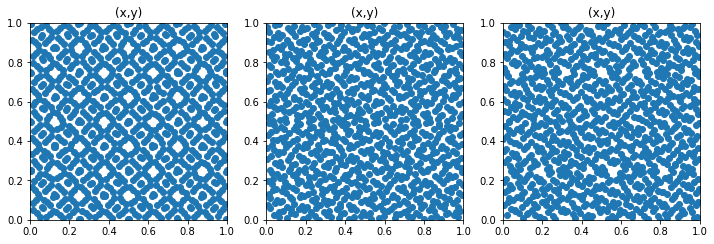

In [20]:
fig, ax = plt.subplots(1,3, figsize=(12,4))

project(ax[0], xs, 0,1,title="(x,y)")
project(ax[1], xs, 0,2,title="(x,y)")
project(ax[2], xs, 1,2,title="(x,y)")


In [21]:
#with high dimensions eand not enough draws, subspaces can be covered incorrectly
seed = 242656
rng = SobolRsg(5000,seed)

In [22]:
xs = [ rng.nextSequence().value() for i in range(511)]

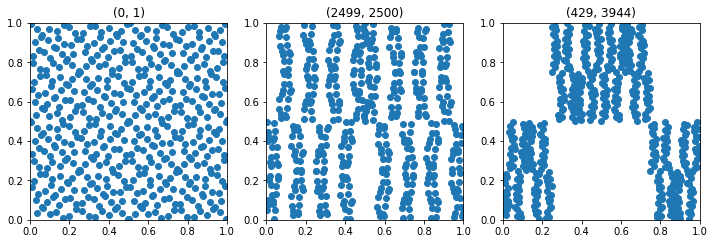

In [23]:
fig, ax = plt.subplots(1,3, figsize=(12,4))
project(ax[0], xs, 0,1)
project(ax[1], xs, 2499,2500)
project(ax[2], xs, 429,3944)

In [24]:
#With pseudo-random numbers we have bad statistics but at least the poinst
#would be scattered randomly

In [25]:
rng = MersenneTwisterUniformRng(42)

In [26]:
xs = [ [ rng.next().value() for _ in range(5000)] for _ in range(511) ]

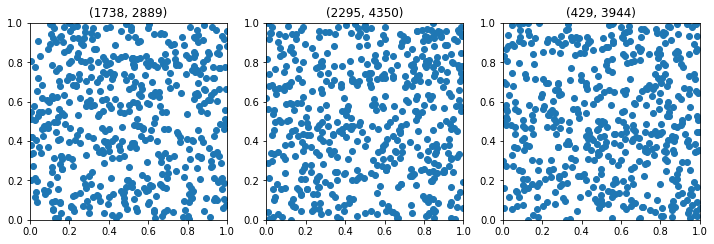

In [28]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
project(ax[0], xs, 1738,2889)
project(ax[1], xs, 2295, 4350)
project(ax[2], xs, 429, 3944)